<a href="https://colab.research.google.com/github/kikosikera/2018_11_11_pwc_aproach/blob/master/2022_08_09_tfl_mpl_ker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Recognition and Classification using Convolutional Neural Networks**

*   List item
*   List item



In this study, a model has developed to detect unwanted potholes,  using machine learning tools. A Kaggle dataset was curated in order to produce pothole detection using CNN (Convolutional Neural Networks).

This project proposes a method where Tensorflow pre-trained model detects road damage in different situations. The experimental results demonstrate high accuracy although there are many obstacles on the road.




#####**IMPORTING LIBRARIES**

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Using TensorFlow backend
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#####**CHECKING IMAGES FOR CONFIRMATION**

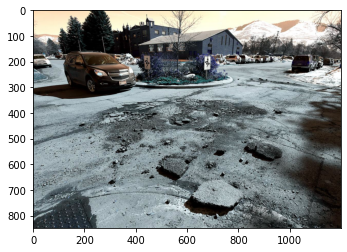

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/potholes/12.jpg"))

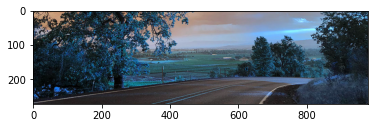

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/normal/83.jpg"))

####**Part 1 - Data Preprocessing**

#####****Splitting dataset into training and validation and preprocessing the training set****

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, validation_split=0.2)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/', target_size = (64, 64),
                                                 batch_size = 32, class_mode = 'binary', subset="training")

Found 546 images belonging to 2 classes.


#####**Preprocessing the validation set**

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


####**Part 2 - Building the CNN**

#####**Initialising the CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

#####**Step 1 - Convolution**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#####**Step 2 - Pooling**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#####**Adding a second convolutional layer**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#####**Step 3 - Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

#####**Step 4 - Full Connection**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#####**Step 5 - Output Layer**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

####**Part 3 - Training the CNN**

#####**Compiling the CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#####**Training the CNN on the Training set and evaluating it on the Validation set**

In [ ]:
training_history = cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Epoch 1/25
18/18 [==============================] - 22s 1s/step - loss: 0.5795 - accuracy: 0.6832 - val_loss: 0.4514 - val_accuracy: 0.7926
Epoch 2/25
18/18 [==============================] - 19s 1s/step - loss: 0.5285 - accuracy: 0.7363 - val_loss: 0.5128 - val_accuracy: 0.7630
Epoch 3/25
18/18 [==============================] - 19s 1s/step - loss: 0.3890 - accuracy: 0.8443 - val_loss: 0.3767 - val_accuracy: 0.7778
Epoch 4/25
18/18 [==============================] - 21s 1s/step - loss: 0.3308 - accuracy: 0.8516 - val_loss: 0.4112 - val_accuracy: 0.8074
Epoch 5/25
18/18 [==============================] - 19s 1s/step - loss: 0.2990 - accuracy: 0.8773 - val_loss: 0.5448 - val_accuracy: 0.7556
Epoch 6/25
18/18 [==============================] - 19s 1s/step - loss: 0.3195 - accuracy: 0.8626 - val_loss: 0.4124 - val_accuracy: 0.8370
Epoch 7/25
18/18 [==============================] - 20s 1s/step - loss: 0.2541 - accuracy: 0.9084 - val_loss: 0.3870 - val_accuracy: 0.8519
Epoch 8/25
18/18 [==

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

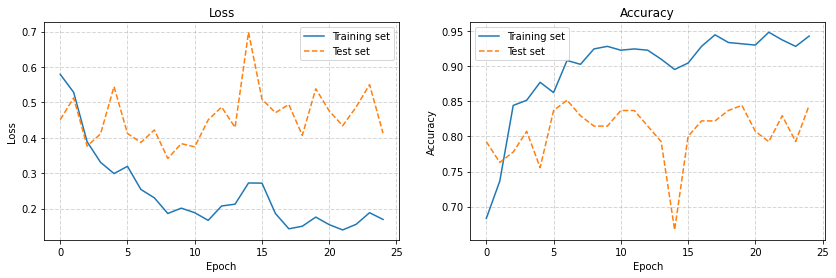

In [ ]:
render_training_history(training_history)

####**Part 4 - Making a single prediction**

normal


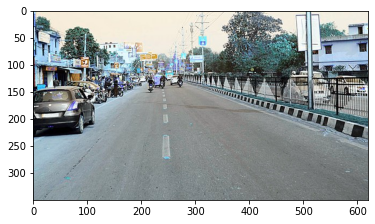

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/normal/18.jpg', target_size = (64, 64))
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/normal/18.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'


print(prediction)

normal


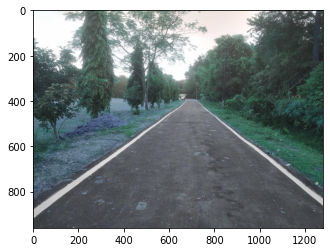

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/normal/48.jpg', target_size = (64, 64))
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/normal/48.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'


print(prediction)

pothole


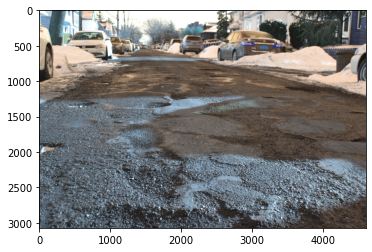

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/potholes/39.jpg', target_size = (64, 64))
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/potholes/39.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'


print(prediction)

pothole


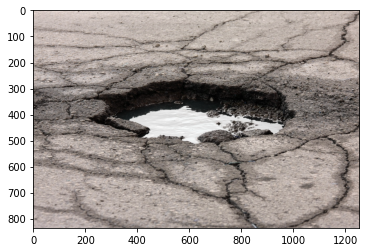

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/potholes/128.jpg', target_size = (64, 64))
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/PRO/2022_08_09_tfl_mpl_ker/data/photos/potholes/128.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'


print(prediction)

###############################################################################